In [1]:
from Datapipeline import Datapipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [2]:
df = pd.read_csv('../train.csv')
labels = df['Churn']
df = df.drop('Churn', axis='columns')

In [3]:
df_test = pd.read_csv('../test.csv')
labels_test = df_test['Churn']
customers_test = df_test.drop('Churn', axis='columns')

In [4]:
pl = Datapipeline()

In [5]:
stacking_RF_GNB_KNN_LR = StackingClassifier(
    estimators= [
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB()),
        ("KNN", KNeighborsClassifier(n_neighbors=5, weights = 'distance'))
        ], 
    final_estimator=SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42)
)

In [6]:
pl.steps.append(['classifier', stacking_RF_GNB_KNN_LR])

In [7]:
pl.fit(df, labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('outlier_handling',
                                                                   OutlierHandling()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'CC_Contacted_LY',
                                                   'Service_Score',
                                                   'Account_user_count',
                                                   'CC_Agent_Score',
                                                   'rev_per_month',
                                                   'Complain_ly',
                                                   'rev_growth_yoy',
                                                   'coupon_used_for...
                                                  ['Payment', 'City_Tier',
                                                   'Gender', 'account_segment',
                                                   'Marital_Status',
                                                   'Login_device'])])),
                ['classifier',
                 StackingClassifier(estimators=[('Random Forest',
                                                 RandomForestClassifier(random_state=42)),
                                                ('Naive Bayes', GaussianNB()),
                                                ('KNN',
                                                 KNeighborsClassifier(weights='distance'))],
                                    final_estimator=SGDClassifier(loss='log_loss',
                                                                  penalty='elasticnet',
                                                                  random_state=42))]])

In [8]:
pred_test = pl.predict(customers_test)
print("\tAcc: {:.4f}\tPre: {:.4f}\tRecall: {:.4f}\tF1: {:.4f}".format(accuracy_score(labels_test, pred_test), precision_score(labels_test, pred_test), recall_score(labels_test, pred_test), f1_score(labels_test, pred_test)))

	Acc: 0.9876	Pre: 0.9606	Recall: 0.9657	F1: 0.9632


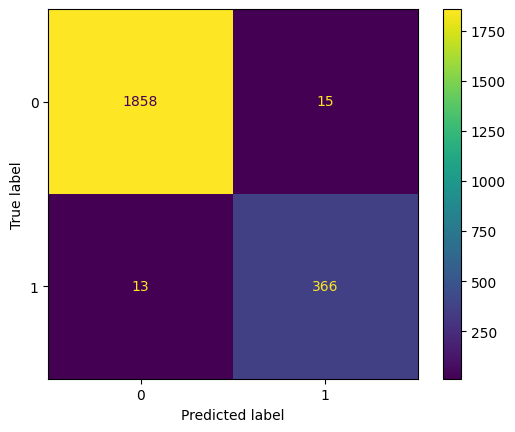

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(labels_test, pred_test, labels=pl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()